# Converting all the stories to CSV file and data frames

In [74]:
import os
import re
import nltk
#nltk.download('punkt')
import pandas as pd
from tqdm import tqdm


In [75]:

def read_text_file(text_file_path):
    print('Reading file in ', text_file_path)
    with open(text_file_path, 'r',encoding = "utf8") as f:
        text_data = f.read()
    return text_data


def save_text_file(text_data, output_file_path):
    print('Saving file in ', output_file_path)
    with open(output_file_path, 'w') as f:
        f.write(text_data)

In [76]:
def read_ground_summary(gt_text):
    pattern = re.compile(r'@highlight')
    highlight_index_list = []
    for this_match in pattern.finditer(gt_text):
        highlight_index_list.append([this_match.start(), this_match.end()])
    if not len(highlight_index_list):
        return gt_text, ''
    full_text = gt_text[0:highlight_index_list[0][0]]
    summary_text = []
    for i in range(0, len(highlight_index_list)-1):
        summary_text.append(gt_text[highlight_index_list[i][1]:highlight_index_list[i+1][0]])
    summary_text.append(gt_text[highlight_index_list[-1][1]:])
    summary_text = '\n'.join(summary_text)
    return full_text, summary_text

In [77]:
train_folder_path = 'D:\\__Coding\\Text_summarisation\\dataset\\train'
train_file_list = [os.path.join(train_folder_path, x) for x in os.listdir(train_folder_path)]

In [78]:
train_df = pd.DataFrame()
for this_file_path in tqdm(train_file_list):
    input_text = read_text_file(this_file_path)
    this_file_actual_text, this_summary = read_ground_summary(input_text)
    train_df = train_df.append([[this_file_actual_text, this_summary]])
train_df.reset_index(drop=True, inplace=True)
train_df.columns = ['InputText', 'Summary']

 50%|████████████████████████████████████████                                        | 55/110 [00:00<00:00, 546.00it/s]

Reading file in  D:\__Coding\Text_summarisation\dataset\train\00ae31ff5ede1de6cd39eccf36bae935c882527b.story
Reading file in  D:\__Coding\Text_summarisation\dataset\train\00aee24828cbceb3857579c59c9a85f381e358a5.story
Reading file in  D:\__Coding\Text_summarisation\dataset\train\00aef73f30847c2ae2326e26811065f0308157df.story
Reading file in  D:\__Coding\Text_summarisation\dataset\train\00af3b469010e46f154734cfba77bb001791517f.story
Reading file in  D:\__Coding\Text_summarisation\dataset\train\00afa094e59946ddc8129b36146e416c02109030.story
Reading file in  D:\__Coding\Text_summarisation\dataset\train\00afa371dfbfc7832433f22da65ca96fe9997560.story
Reading file in  D:\__Coding\Text_summarisation\dataset\train\00b0ebf0c27ebcc181e6c60070a9031f41b7d1d8.story
Reading file in  D:\__Coding\Text_summarisation\dataset\train\00b164fcf3e920125153d4e4bb59f4ceb5ddb1f7.story
Reading file in  D:\__Coding\Text_summarisation\dataset\train\00b287c19561791776e970936f96273b9ececc15.story
Reading file in  D:

100%|███████████████████████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 574.44it/s]

Reading file in  D:\__Coding\Text_summarisation\dataset\train\ffff11a2f44d731cd80c86819a89b7e227581415.story
Reading file in  D:\__Coding\Text_summarisation\dataset\train\ffff2dc1cc4888253a4733f808959f0b4eab26a6.story
Reading file in  D:\__Coding\Text_summarisation\dataset\train\ffff522cebe5ad9dcfb6dfc476b8f423f3f8dd34.story
Reading file in  D:\__Coding\Text_summarisation\dataset\train\Untitled.ipynb


In [79]:
train_df.head()

,InputText,Summary
0,"BEIJING, China (CNN) -- The head of China's quality watchdog is reported to have resigned over the tainted baby milk scandal that has killed four children and sickened nearly 53,000 others.\n\nThe...",\n\nHead of China's quality watchdog resigns over tainted baby formula scandal\n\n\n\n\nWHO representative said scandal shows up flaws in China's food supply chain\n\n\n\n\nFour infants in China d...
1,"Clarksburg, West Virginia (CNN) -- North Central West Virginia Airport boasts quick check-ins, free, accessible parking and a convenient baggage claim.\n\nThat's not surprising, considering that ...","\n\nNorth Central West Virginia airport offers free sightseeing flights to boost numbers\n\n\n\n\nOther small airports offer free flights, Christmas light tours to increase passenger traffic\n\n\n..."
2,"ISTANBUL, Turkey (CNN) -- It's a common sight in the traffic-clogged streets of Istanbul, a city that straddles two continents.\n\nWorkers next to the spot where subway trains will one day emerge ...",\n\nA 1.4 km long subway tunnel is being constructed under Istanbul's Bosphorus Strait\n\n\n\n\nOperation uncovered the lost 4th century AD Byzantine port of Theodosius\n\n\n\n\nThirty-four 1000-y...
3,(CNN) -- A Florida exterminator and father of four children adopted from Florida's foster care system has told police that a body found in the pest-control truck he was driving is one of them -- h...,"\n\nNEW:Barahona charged with aggravated child abuse\n\n\n\n\nThe couple's remaining two children have been placed in foster care, court officials said\n\n\n\n\nThe girl's body was in a plastic ba..."
4,"Yangon, Myanmar (CNN) -- When Burmese commuters have an accident they don't dial 911 or any ordinary emergency service.\n\nThey call the country's version of Marlon Brando, a heartthrob in the 198...",\n\nAward-winning Burmese actor gave up films to operate free funeral services\n\n\n\n\nKyaw Thu was considered a heartthrob in the 1980s and 1990s\n\n\n\n\nHe formed Free Funeral Service Society ...


In [80]:
train_df.to_csv('news_sample.csv')

# Importing necessary packages

In [81]:
#numpy: for handling arrays.
#pandas: for DataFrame.
#re (regex): for cleaning text.
#tensorflow (keras): for machine learning or deep learning.
#nltk (NLP tool kit) : used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).
#attention: for attention mechanism (I am provided it on my github — below this article.)
import numpy as np
import pandas as pd 
import re
from tensorflow.keras.preprocessing.text import Tokenizer 

from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
#from tensorflow.keras.layers import Attention
from attention import AttentionLayer
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")


In [82]:
import nltk
from nltk import download

nltk.download()



showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [83]:
#Read csv and 
#see some top 5 headline and text, and print our data shape.

In [2]:
news = pd.read_csv("news_sample.csv")
print(news.shape)
news.head()

(110, 3)


,Unnamed: 0,InputText,Summary
0,0,"BEIJING, China (CNN) -- The head of China's quality watchdog is reported to have resigned over the tainted baby milk scandal that has killed four children and sickened nearly 53,000 others.\n\nThe...",\n\nHead of China's quality watchdog resigns over tainted baby formula scandal\n\n\n\n\nWHO representative said scandal shows up flaws in China's food supply chain\n\n\n\n\nFour infants in China d...
1,1,"Clarksburg, West Virginia (CNN) -- North Central West Virginia Airport boasts quick check-ins, free, accessible parking and a convenient baggage claim.\n\nThat's not surprising, considering that ...","\n\nNorth Central West Virginia airport offers free sightseeing flights to boost numbers\n\n\n\n\nOther small airports offer free flights, Christmas light tours to increase passenger traffic\n\n\n..."
2,2,"ISTANBUL, Turkey (CNN) -- It's a common sight in the traffic-clogged streets of Istanbul, a city that straddles two continents.\n\nWorkers next to the spot where subway trains will one day emerge ...",\n\nA 1.4 km long subway tunnel is being constructed under Istanbul's Bosphorus Strait\n\n\n\n\nOperation uncovered the lost 4th century AD Byzantine port of Theodosius\n\n\n\n\nThirty-four 1000-y...
3,3,(CNN) -- A Florida exterminator and father of four children adopted from Florida's foster care system has told police that a body found in the pest-control truck he was driving is one of them -- h...,"\n\nNEW:Barahona charged with aggravated child abuse\n\n\n\n\nThe couple's remaining two children have been placed in foster care, court officials said\n\n\n\n\nThe girl's body was in a plastic ba..."
4,4,"Yangon, Myanmar (CNN) -- When Burmese commuters have an accident they don't dial 911 or any ordinary emergency service.\n\nThey call the country's version of Marlon Brando, a heartthrob in the 198...",\n\nAward-winning Burmese actor gave up films to operate free funeral services\n\n\n\n\nKyaw Thu was considered a heartthrob in the 1980s and 1990s\n\n\n\n\nHe formed Free Funeral Service Society ...


In [ ]:
#Here we see that we have 110 rows and 3 columns.

In [ ]:
#drop 'unnamed 0' which is not suitable

In [3]:
news.drop('Unnamed: 0',axis = 1, inplace = True)

In [4]:
news.head()

,InputText,Summary
0,"BEIJING, China (CNN) -- The head of China's quality watchdog is reported to have resigned over the tainted baby milk scandal that has killed four children and sickened nearly 53,000 others.\n\nThe...",\n\nHead of China's quality watchdog resigns over tainted baby formula scandal\n\n\n\n\nWHO representative said scandal shows up flaws in China's food supply chain\n\n\n\n\nFour infants in China d...
1,"Clarksburg, West Virginia (CNN) -- North Central West Virginia Airport boasts quick check-ins, free, accessible parking and a convenient baggage claim.\n\nThat's not surprising, considering that ...","\n\nNorth Central West Virginia airport offers free sightseeing flights to boost numbers\n\n\n\n\nOther small airports offer free flights, Christmas light tours to increase passenger traffic\n\n\n..."
2,"ISTANBUL, Turkey (CNN) -- It's a common sight in the traffic-clogged streets of Istanbul, a city that straddles two continents.\n\nWorkers next to the spot where subway trains will one day emerge ...",\n\nA 1.4 km long subway tunnel is being constructed under Istanbul's Bosphorus Strait\n\n\n\n\nOperation uncovered the lost 4th century AD Byzantine port of Theodosius\n\n\n\n\nThirty-four 1000-y...
3,(CNN) -- A Florida exterminator and father of four children adopted from Florida's foster care system has told police that a body found in the pest-control truck he was driving is one of them -- h...,"\n\nNEW:Barahona charged with aggravated child abuse\n\n\n\n\nThe couple's remaining two children have been placed in foster care, court officials said\n\n\n\n\nThe girl's body was in a plastic ba..."
4,"Yangon, Myanmar (CNN) -- When Burmese commuters have an accident they don't dial 911 or any ordinary emergency service.\n\nThey call the country's version of Marlon Brando, a heartthrob in the 198...",\n\nAward-winning Burmese actor gave up films to operate free funeral services\n\n\n\n\nKyaw Thu was considered a heartthrob in the 1980s and 1990s\n\n\n\n\nHe formed Free Funeral Service Society ...


In [ ]:
#check for null values

In [5]:
news.isnull().sum()

InputText    0
Summary      1
dtype: int64

In [19]:
news = news.dropna()

In [64]:
#Removing unnecessary text. For Example:
#CURRENCIES
#EMAILS
#CONTRACTIONS
#Contraction: changing short word to long. For Example: “ain’t” = “is not”; “can’t” = “cannot”.

In [20]:
CURRENCIES = {
    "$": "USD", "zł": "PLN", "£": "GBP", "¥": "JPY", "฿": "THB", "₡": "CRC", "₦": "NGN","₩": "KRW",
    "₪": "ILS", "₫": "VND", "€": "EUR", "₱": "PHP", "₲": "PYG", "₴": "UAH", "₹": "INR",}
CURRENCY_REGEX = re.compile(
    "({})+".format("|".join(re.escape(c) for c in CURRENCIES.keys())))

EMAIL_REGEX = re.compile(
    r"(?:^|(?<=[^\w@.)]))([\w+-](\.(?!\.))?)*?[\w+-]@(?:\w-?)*?\w+(\.([a-z]{2,})){1,3}(?:$|(?=\b))",
    flags=re.IGNORECASE | re.UNICODE,)

# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions =          {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have", "i've": "i have"}
def clean_text(text, remove_stopwords = True):
    
    text = str(text).lower()
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    #text = EMAIL_REGEX.sub(' ',text)
   # text = CURRENCY_REGEX.sub(' ',text)
    #text = ' '.join([contractions[t] if t in contractions else t for t in text.split(" ")])    
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r"'s\b","", text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'\[[0-9]*\]',' ',str(text) )
    
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

# clean our both headlines and text

In [21]:
cleaned_headlines = []
cleaned_text = []

for headlines in news['Summary']:
    cleaned_headlines.append(clean_text(headlines, remove_stopwords=False))
print("Headlines are complete.")

for text in news['InputText']:
    cleaned_text.append(clean_text(text))
print("Texts are complete.")

Headlines are complete.
Texts are complete.


# Inspect Some clean data

In [8]:
for i in range(4):
    print("Review: ",i+1) # You can change it by "Review" to "Headline"
    print(cleaned_headlines[i])
    print('-'*80)
    print(cleaned_text[i])
    print()

Review:  1
head of china quality watchdog resigns over tainted baby formula scandal who representative said scandal shows up flaws in china food supply chain four infants in china dead  53 000 reported ill from tainted milk powder
--------------------------------------------------------------------------------
beijing china cnn head china quality watchdog reported resigned tainted baby milk scandal killed four children sickened nearly 53 000 others official xinhua news agency said li changjiang quit approval china state council li agency responsible ensuring china food supply chain safe monday resignation came hours world health organization said scandal highlighted flaws country entire food supply chain chemical melamine blamed causing kidney stones kidney failure detected formula milk powder 22 dairies across china crisis initially thought confined baby milk powder tests found melamine samples liquid milk taken china two largest dairy producers mengniu dairy group yili industrial gro

# Plotting our distribution of words

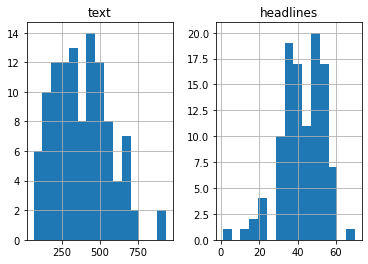

In [9]:
import matplotlib.pyplot as plt #pip install matplotlib

text_word_count = []
headlines_word_count = []

for i in cleaned_text:
    text_word_count.append(len(i.split()))
for i in cleaned_headlines:
    headlines_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text': text_word_count, 'headlines': headlines_word_count})
length_df.hist(bins=15)
plt.show()

In [10]:
count = 0
for i in cleaned_text:
    if(len(i.split())<=750):
        count += 1
print(count/len(cleaned_text))

0.9727272727272728


# Splitting Data

In [65]:
max_headlines_len=60
max_text_len=750

cleaned_text = np.array(cleaned_text)

cleaned_headlines = np.array(cleaned_headlines)

short_text=[]
short_headlines=[]

for i in range(len(cleaned_text)):
    
    if(len(cleaned_headlines[i].split())<=max_headlines_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_headlines.append(cleaned_headlines[i])
        print(short_headlines)

df=pd.DataFrame({'text':short_text,'headlines':short_headlines})
df['headlines'] = df['headlines'].apply(lambda x : 'sostok '+ x + ' eostok')

from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['headlines']),test_size=0.1,random_state=0,shuffle=True)
df.head()

['head of china quality watchdog resigns over tainted baby formula scandal who representative said scandal shows up flaws in china food supply chain four infants in china dead  53 000 reported ill from tainted milk powder']
['head of china quality watchdog resigns over tainted baby formula scandal who representative said scandal shows up flaws in china food supply chain four infants in china dead  53 000 reported ill from tainted milk powder', 'north central west virginia airport offers free sightseeing flights to boost numbers other small airports offer free flights  christmas light tours to increase passenger traffic republican senator wants faa and government accountability office to investigate']
['head of china quality watchdog resigns over tainted baby formula scandal who representative said scandal shows up flaws in china food supply chain four infants in china dead  53 000 reported ill from tainted milk powder', 'north central west virginia airport offers free sightseeing fligh

,text,headlines
0,beijing china cnn head china quality watchdog reported resigned tainted baby milk scandal killed four children sickened nearly 53 000 others official xinhua news agency said li changjiang quit app...,sostok head of china quality watchdog resigns over tainted baby formula scandal who representative said scandal shows up flaws in china food supply chain four infants in china dead 53 000 reporte...
1,clarksburg west virginia cnn north central west virginia airport boasts quick check ins free accessible parking convenient baggage claim surprising considering fewer 20 people fly facility given d...,sostok north central west virginia airport offers free sightseeing flights to boost numbers other small airports offer free flights christmas light tours to increase passenger traffic republican ...
2,istanbul turkey cnn common sight traffic clogged streets istanbul city straddles two continents workers next spot subway trains one day emerge tunnel opening tunnel delayed least four years discov...,sostok a 1 4 km long subway tunnel is being constructed under istanbul bosphorus strait operation uncovered the lost 4th century ad byzantine port of theodosius thirty four 1000 year old ships hav...
3,cnn florida exterminator father four children adopted florida foster care system told police body found pest control truck driving one 10 year old daughter authorities said wednesday jorge barahon...,sostok new barahona charged with aggravated child abuse the couple remaining two children have been placed in foster care court officials said the girl body was in a plastic bag an affidavit sai...
4,yangon myanmar cnn burmese commuters accident dial 911 ordinary emergency service call country version marlon brando heartthrob 1980s 90s turned back film industry run fleet ambulances bury nation...,sostok award winning burmese actor gave up films to operate free funeral services kyaw thu was considered a heartthrob in the 1980s and 1990s he formed free funeral service society after hearing t...


# Tokenizing

In [66]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print(x_voc)

% of rare words in vocabulary: 75.78099127939066
Total Coverage of rare words: 28.266812465828323
2195


In [67]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh=6
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_headlines_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_headlines_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

y_tokenizer.word_counts['sostok'],len(y_tr)

% of rare words in vocabulary: 96.08908202064096
Total Coverage of rare words: 60.98741529525653


(94, 94)

In [68]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

# Training Model

In [ ]:
#Adding a Embedding layer of 110 dimension to embed our text or sequences.
#Adding 3 LSTM layer for encoder with 200 (latent dimension).
#Adding a LSTM layer for decoder with 200 (latent dimension) with attention mechanism.
#Adding a Dense Layer with “softmax” activation function.

In [69]:
from tensorflow.keras import backend as K 
K.clear_session()

latent_dim = 200
embedding_dim=110

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 750)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 750, 110)     241450      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 750, 200), ( 248800      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [70]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=5,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/5
1/1 [==============================] - 316s 316s/step - loss: 4.2914 - val_loss: 3.8637
Epoch 2/5
1/1 [==============================] - 323s 323s/step - loss: 3.8767 - val_loss: 1.6207
Epoch 3/5
1/1 [==============================] - 309s 309s/step - loss: 1.5336 - val_loss: 2.1481
Epoch 4/5
1/1 [==============================] - 312s 312s/step - loss: 2.1116 - val_loss: 1.3654
Epoch 5/5
1/1 [==============================] - 338s 338s/step - loss: 1.3057 - val_loss: 1.2813


In [ ]:
#Setup Decoder to get final result

In [71]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_headlines_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [73]:
for i in range(0,1):
    print("Review:",seq2text(x_tr[i]))
    print("\n")
    print("Original summary:",seq2summary(y_tr[i]))
    print("\n")
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: london cnn following year people power cry arab spring movement annual world economic forum might seem never mind 1 0 around 2 600 world top political business leaders coming together address big issues debt crisis swiss ski resort among europe highest altitude town january 25 29 saudi arabia like george senior facebook google tech leaders countries including south africa world nation south free state civil society faith leaders international organizations among others paying face 20 000 price costs easily push bill 40 000 true power influence secure white means event may seem forum say current global give discussions even greater year great new models german founded world economic forum says new decision making models needed changed global rising seen behind movement arab spring risks threat current economic environment needs placed new models quality economic growth given rising unemployment spain europe worst affected country among young people stands 45 new model job also n